In [116]:
import fastf1 as ff1 #core data import
import numpy as np #file io
import pandas as pd #linear algebra
import matplotlib.pyplot as plt #graphical interpretation
import fastf1.plotting
ff1.Cache.enable_cache('Downloads\\FF1_graphing\\fast_f1') #enable data caching
%matplotlib notebook

Now we obtain all races in an array

In [77]:
races = []
for i in range(0,19):
    races.append(ff1.get_session(2021, i).get_race())#gets races 0-18 of the 2020 season
    races[i].load_laps()
races[0].results

core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '44', '77', '16', '10', '3', '4', '55', '14', '18', '11', '99', '22', '7', '63', '31', '6', '47', '', '5']
core           INFO 	Loading laps for Bahrain Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core     

api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '3', '4', '44', '16', '55', '99', '11', '18', '14', '5', '31', '6', '63', '', '9', '88', '47', '77', '10']
core           INFO 	Loading laps for Russian Grand Prix - Race [v2.1.8]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['4', '55', '63', '44', '3', '14'

[{'number': '44',
  'position': '1',
  'positionText': '1',
  'points': '25',
  'Driver': {'driverId': 'hamilton',
   'permanentNumber': '44',
   'code': 'HAM',
   'url': 'http://en.wikipedia.org/wiki/Lewis_Hamilton',
   'givenName': 'Lewis',
   'familyName': 'Hamilton',
   'dateOfBirth': '1985-01-07',
   'nationality': 'British'},
  'Constructor': {'constructorId': 'mercedes',
   'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One',
   'name': 'Mercedes',
   'nationality': 'German'},
  'grid': '2',
  'laps': '56',
  'status': 'Finished',
  'Time': {'millis': '5523897', 'time': '1:32:03.897'},
  'FastestLap': {'rank': '4',
   'lap': '44',
   'Time': {'time': '1:34.015'},
   'AverageSpeed': {'units': 'kph', 'speed': '207.235'}}},
 {'number': '33',
  'position': '2',
  'positionText': '2',
  'points': '18',
  'Driver': {'driverId': 'max_verstappen',
   'permanentNumber': '33',
   'code': 'VER',
   'url': 'http://en.wikipedia.org/wiki/Max_Verstappen',
   'givenName': 'Max',


In [109]:
race_data_pos_gain = []
colors = ff1.plotting.TEAM_COLORS
for race in races:#for each race in the season
    data = {'names':[], 'team_color':[], 'gained_positions':[]}#recepticle for data from that race
    for driver in race.results:#get driver info
        name = driver['Driver']['code']
        #TODO: check for and rule out dnf data
        if(not race.get_driver(name).dnf):
            data['names'].append(driver['Driver']['code'])
            data['team_color'].append(colors[driver['Constructor']['name']])
            grid = driver['grid']
            position = driver['position']
            data['gained_positions'].append((int)(grid)-(int)(position))
    df = pd.DataFrame(data)
    df.set_index('names')
    print(race.name +": "+race.weekend.name)
    print(df)
    race_data_pos_gain.append(df)

Race: Bahrain Grand Prix
   names team_color  gained_positions
0    HAM    #00d2be                 1
1    VER    #0600ef                -1
2    BOT    #00d2be                 0
3    NOR    #ff8700                 3
4    PER    #0600ef                -5
5    LEC    #dc0000                -2
6    RIC    #ff8700                -1
7    SAI    #dc0000                 0
8    TSU    #2b4562                 4
9    STR    #006f62                 0
10   RAI    #900000                 3
11   GIO    #900000                 0
12   OCO    #0090ff                 3
13   RUS    #005aff                 1
14   VET    #006f62                 5
15   MSC    #ffffff                 2
Race: Bahrain Grand Prix
   names team_color  gained_positions
0    HAM    #00d2be                 1
1    VER    #0600ef                -1
2    BOT    #00d2be                 0
3    NOR    #ff8700                 3
4    PER    #0600ef                -5
5    LEC    #dc0000                -2
6    RIC    #ff8700                -1


We have assembled our data, now we plot it.

   names team_color  gained_positions
0    HAM    #00d2be                 1
1    VER    #0600ef                -1
2    BOT    #00d2be                 0
3    NOR    #ff8700                 3
4    PER    #0600ef                -5
5    LEC    #dc0000                -2
6    RIC    #ff8700                -1
7    SAI    #dc0000                 0
8    TSU    #2b4562                 4
9    STR    #006f62                 0
10   RAI    #900000                 3
11   GIO    #900000                 0
12   OCO    #0090ff                 3
13   RUS    #005aff                 1
14   VET    #006f62                 5
15   MSC    #ffffff                 2


<IPython.core.display.Javascript object>


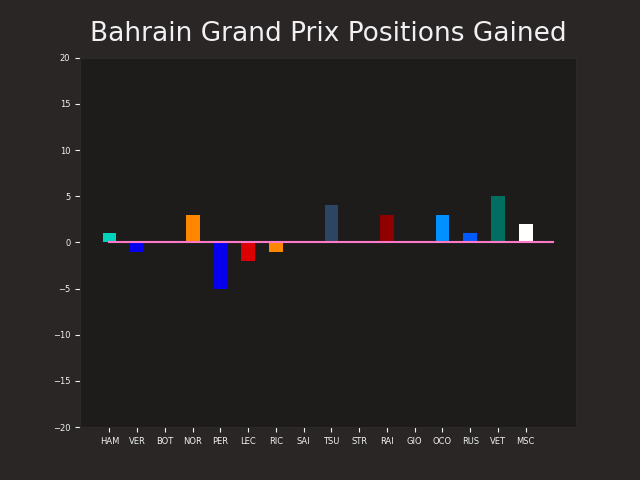

   names team_color  gained_positions
0    HAM    #00d2be                 1
1    VER    #0600ef                -1
2    BOT    #00d2be                 0
3    NOR    #ff8700                 3
4    PER    #0600ef                -5
5    LEC    #dc0000                -2
6    RIC    #ff8700                -1
7    SAI    #dc0000                 0
8    TSU    #2b4562                 4
9    STR    #006f62                 0
10   RAI    #900000                 3
11   GIO    #900000                 0
12   OCO    #0090ff                 3
13   RUS    #005aff                 1
14   VET    #006f62                 5
15   MSC    #ffffff                 2


<IPython.core.display.Javascript object>


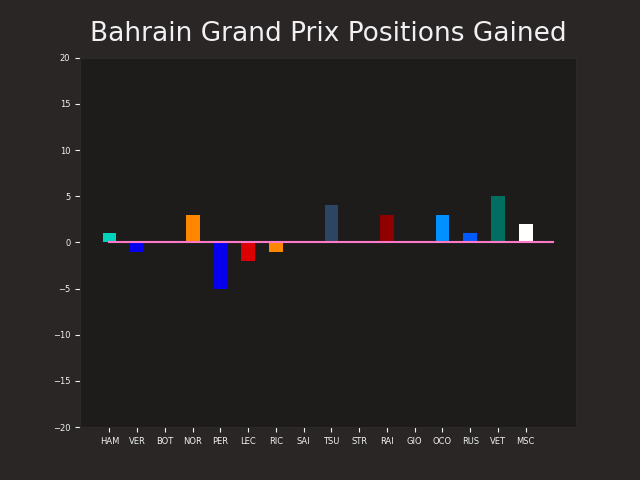

   names team_color  gained_positions
0    VER    #0600ef                 2
1    HAM    #00d2be                -1
2    NOR    #ff8700                 4
3    LEC    #dc0000                 0
4    SAI    #dc0000                 6
5    RIC    #ff8700                 0
6    GAS    #2b4562                -2
7    STR    #006f62                 2
8    OCO    #0090ff                 0
9    ALO    #0090ff                 5
10   PER    #0600ef                -9
11   TSU    #2b4562                 8
12   RAI    #900000                 3
13   GIO    #900000                 3
14   MSC    #ffffff                 2
15   MAZ    #ffffff                 2


<IPython.core.display.Javascript object>


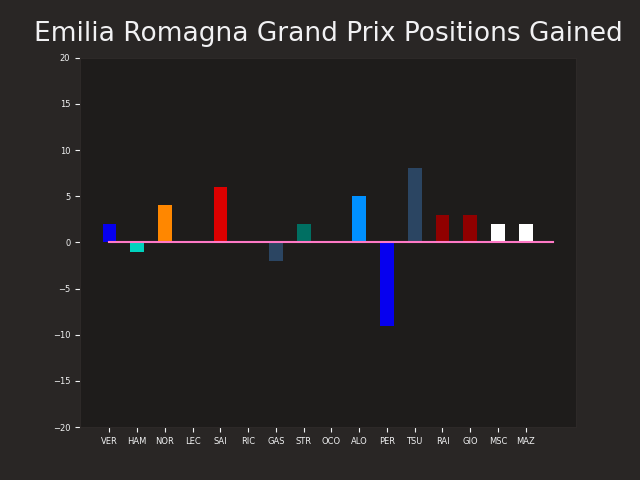

   names team_color  gained_positions
0    HAM    #00d2be                 1
1    VER    #0600ef                 1
2    BOT    #00d2be                -2
3    PER    #0600ef                 0
4    NOR    #ff8700                 2
5    LEC    #dc0000                 2
6    OCO    #0090ff                -1
7    ALO    #0090ff                 5
8    RIC    #ff8700                 7
9    GAS    #2b4562                -1
10   SAI    #dc0000                -6
11   GIO    #900000                 0
12   VET    #006f62                -3
13   STR    #006f62                 3
14   TSU    #2b4562                -1
15   RUS    #005aff                -5
16   MSC    #ffffff                 2
17   LAT    #005aff                 0
18   MAZ    #ffffff                 1


<IPython.core.display.Javascript object>


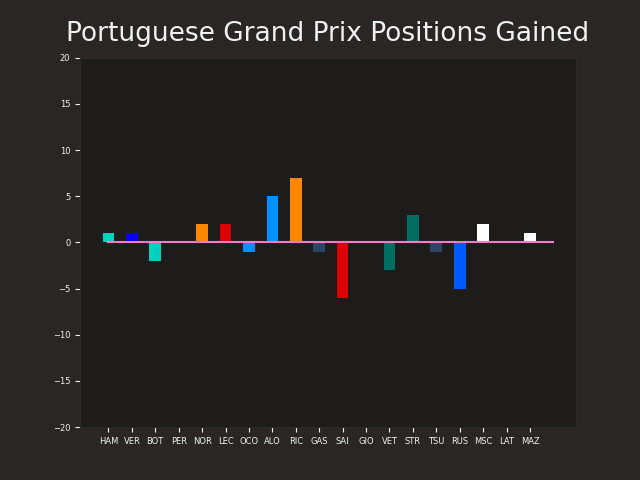

   names team_color  gained_positions
0    HAM    #00d2be                 0
1    VER    #0600ef                 0
2    BOT    #00d2be                 0
3    LEC    #dc0000                 0
4    PER    #0600ef                 3
5    RIC    #ff8700                 1
6    SAI    #dc0000                -1
7    NOR    #ff8700                 1
8    OCO    #0090ff                -4
9    GAS    #2b4562                 2
10   STR    #006f62                 0
11   RAI    #900000                 5
12   VET    #006f62                 0
13   RUS    #005aff                 1
14   GIO    #900000                -1
15   LAT    #005aff                 3
16   ALO    #0090ff                -7
17   MSC    #ffffff                 0
18   MAZ    #ffffff                 1


<IPython.core.display.Javascript object>


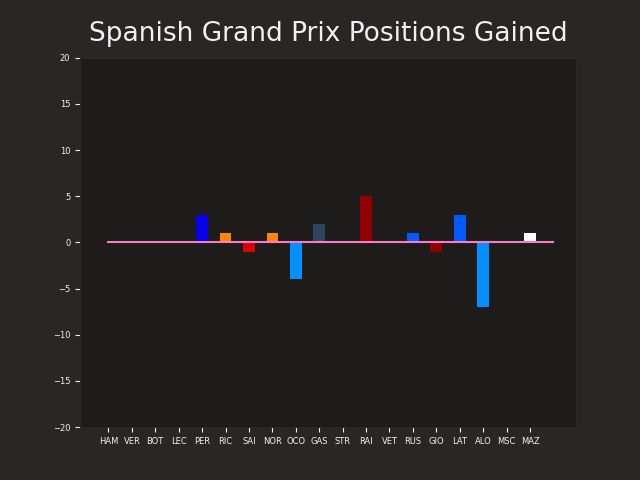

   names team_color  gained_positions
0    VER    #0600ef                 1
1    SAI    #dc0000                 2
2    NOR    #ff8700                 2
3    PER    #0600ef                 5
4    VET    #006f62                 3
5    GAS    #2b4562                 0
6    HAM    #00d2be                 0
7    STR    #006f62                 5
8    OCO    #0090ff                 2
9    GIO    #900000                 0
10   RAI    #900000                 3
11   RIC    #ff8700                 0
12   ALO    #0090ff                 4
13   RUS    #005aff                 1
14   LAT    #005aff                 3
15   TSU    #2b4562                 0
16   MAZ    #ffffff                 2
17   MSC    #ffffff                 2


<IPython.core.display.Javascript object>


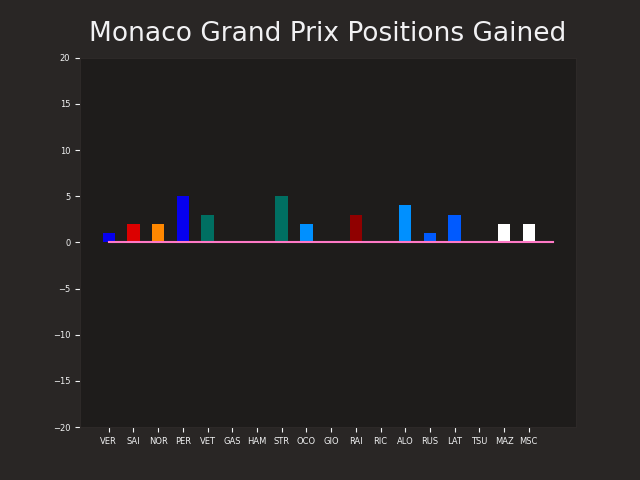

   names team_color  gained_positions
0    PER    #0600ef                 5
1    VET    #006f62                 9
2    GAS    #2b4562                 1
3    LEC    #dc0000                -3
4    NOR    #ff8700                 4
5    ALO    #0090ff                 2
6    TSU    #2b4562                 0
7    SAI    #dc0000                -3
8    RIC    #ff8700                 4
9    RAI    #900000                 4
10   GIO    #900000                 9
11   BOT    #00d2be                -2
12   MSC    #ffffff                 4
13   MAZ    #ffffff                 4
14   HAM    #00d2be               -13
15   LAT    #005aff                 0


<IPython.core.display.Javascript object>


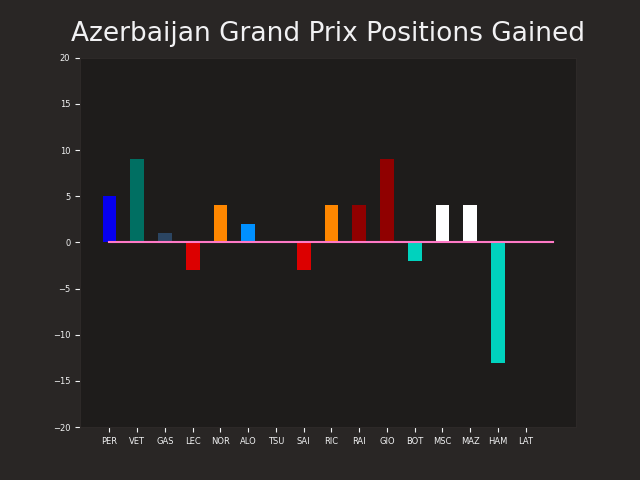

   names team_color  gained_positions
0    VER    #0600ef                 0
1    HAM    #00d2be                 0
2    PER    #0600ef                 1
3    BOT    #00d2be                -1
4    NOR    #ff8700                 3
5    RIC    #ff8700                 4
6    GAS    #2b4562                -1
7    ALO    #0090ff                 1
8    VET    #006f62                 3
9    STR    #006f62                 9
10   SAI    #dc0000                -6
11   RUS    #005aff                 2
12   TSU    #2b4562               -13
13   OCO    #0090ff                -3
14   GIO    #900000                -2
15   LEC    #dc0000                -9
16   RAI    #900000                 0
17   LAT    #005aff                -2
18   MSC    #ffffff                -4
19   MAZ    #ffffff                -2


<IPython.core.display.Javascript object>


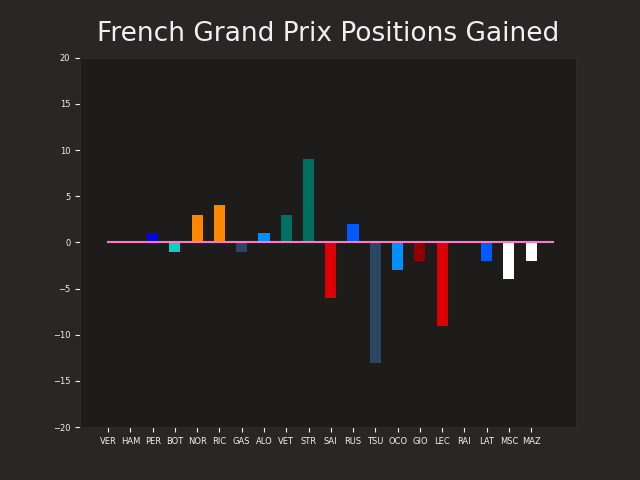

   names team_color  gained_positions
0    VER    #0600ef                 0
1    HAM    #00d2be                 0
2    BOT    #00d2be                 2
3    PER    #0600ef                 0
4    NOR    #ff8700                -2
5    SAI    #dc0000                 6
6    LEC    #dc0000                 0
7    STR    #006f62                 1
8    ALO    #0090ff                -1
9    TSU    #2b4562                 1
10   RAI    #900000                 7
11   VET    #006f62                 2
12   RIC    #ff8700                 0
13   OCO    #0090ff                 3
14   GIO    #900000                 0
15   MSC    #ffffff                 3
16   LAT    #005aff                -1
17   MAZ    #ffffff                 2


<IPython.core.display.Javascript object>


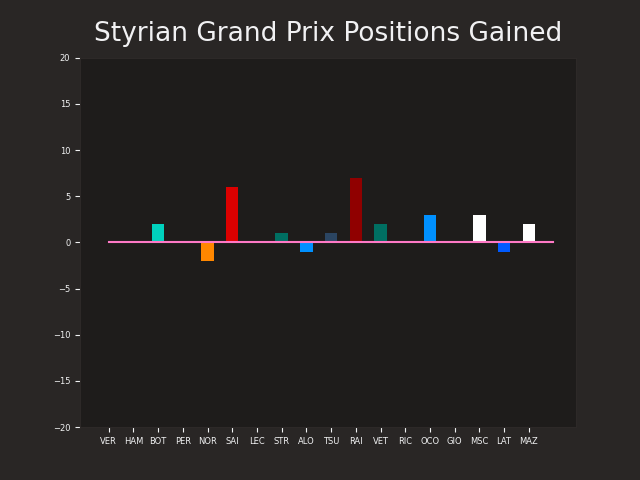

   names team_color  gained_positions
0    VER    #0600ef                 0
1    BOT    #00d2be                 3
2    NOR    #ff8700                -1
3    HAM    #00d2be                 0
4    SAI    #dc0000                 5
5    PER    #0600ef                -3
6    RIC    #ff8700                 6
7    LEC    #dc0000                 4
8    GAS    #2b4562                -3
9    ALO    #0090ff                 4
10   RUS    #005aff                -3
11   TSU    #2b4562                -5
12   STR    #006f62                -4
13   GIO    #900000                 1
14   RAI    #900000                 1
15   LAT    #005aff                 2
16   MSC    #ffffff                 1
17   MAZ    #ffffff                 1


<IPython.core.display.Javascript object>


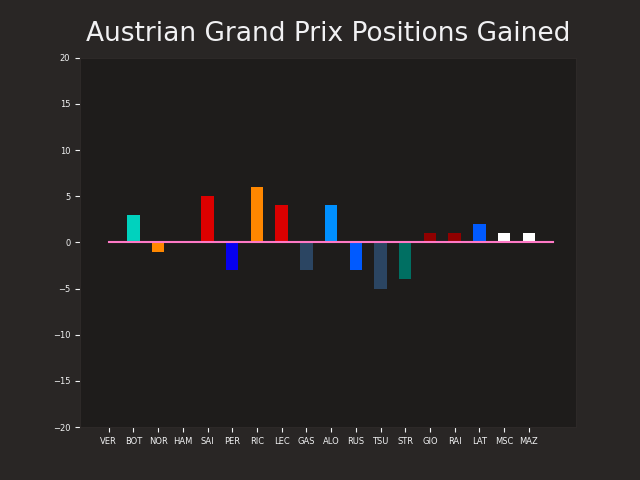

   names team_color  gained_positions
0    HAM    #00d2be                 1
1    LEC    #dc0000                 2
2    BOT    #00d2be                 0
3    NOR    #ff8700                 1
4    RIC    #ff8700                 1
5    SAI    #dc0000                 4
6    ALO    #0090ff                 0
7    STR    #006f62                 6
8    OCO    #0090ff                 0
9    TSU    #2b4562                 6
10   GAS    #2b4562                 0
11   RUS    #005aff                 0
12   GIO    #900000                 2
13   LAT    #005aff                 3
14   RAI    #900000                -2
15   PER    #0600ef               -16
16   MAZ    #ffffff                 2
17   MSC    #ffffff                 0


<IPython.core.display.Javascript object>


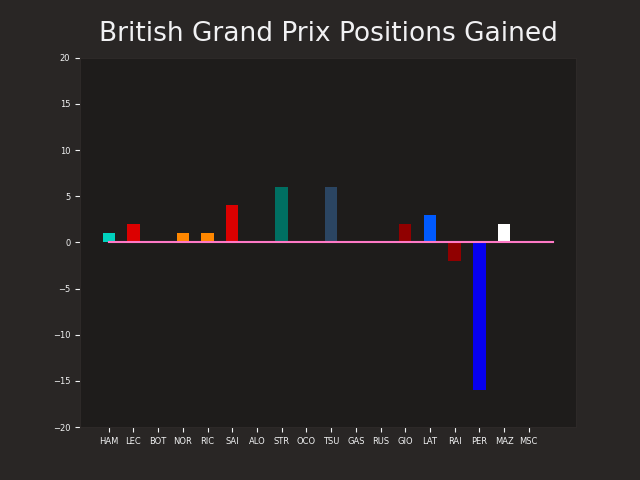

   names team_color  gained_positions
0    OCO    #0090ff                 7
1    HAM    #00d2be                -1
2    SAI    #dc0000                12
3    ALO    #0090ff                 5
4    GAS    #2b4562                 0
5    TSU    #2b4562                10
6    LAT    #005aff                11
7    RUS    #005aff                 9
8    VER    #0600ef                -6
9    RAI    #900000                 3
10   RIC    #ff8700                 0
11   MSC    #ffffff                 8
12   GIO    #900000               -13


<IPython.core.display.Javascript object>


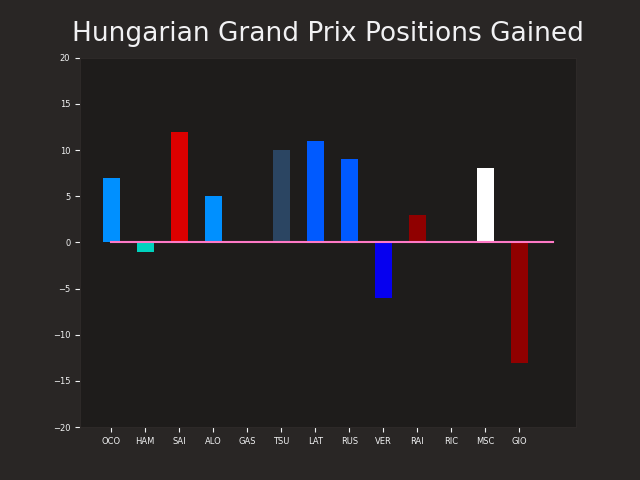

   names team_color  gained_positions
0    VER    #0600ef                 0
1    RUS    #005aff                 0
2    HAM    #00d2be                 0
3    RIC    #ff8700                 0
4    VET    #006f62                 0
5    GAS    #2b4562                 0
6    OCO    #0090ff                 1
7    LEC    #dc0000                 1
8    LAT    #005aff                 1
9    SAI    #dc0000                 1
10   ALO    #0090ff                 1
11   BOT    #00d2be                 1
12   GIO    #900000                 1
13   NOR    #ff8700                 1
14   TSU    #2b4562                 1
15   MSC    #ffffff                 1
16   MAZ    #ffffff                 1
17   STR    #006f62                 1
18   RAI    #900000                 1
19   PER    #0600ef               -13


<IPython.core.display.Javascript object>


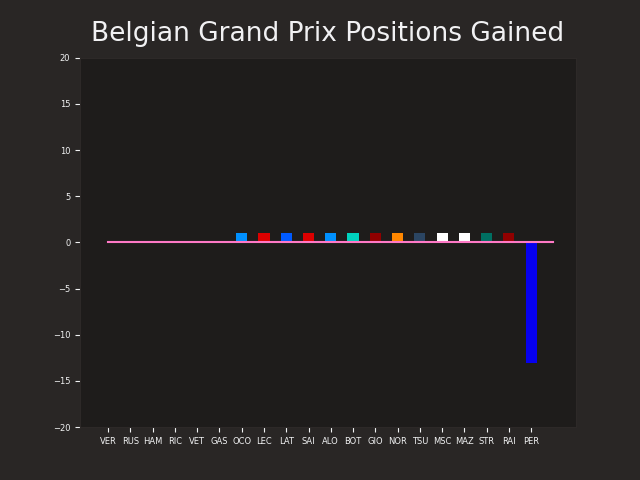

   names team_color  gained_positions
0    VER    #0600ef                 0
1    HAM    #00d2be                 0
2    BOT    #00d2be                 0
3    GAS    #2b4562                 0
4    LEC    #dc0000                 0
5    ALO    #0090ff                 3
6    SAI    #dc0000                -1
7    PER    #0600ef                -8
8    OCO    #0090ff                -1
9    NOR    #ff8700                 3
10   RIC    #ff8700                -1
11   STR    #006f62                 0
12   VET    #006f62                 2
13   GIO    #900000                -7
14   KUB    #900000                 1
15   LAT    #005aff               -16
16   MSC    #ffffff                -1


<IPython.core.display.Javascript object>


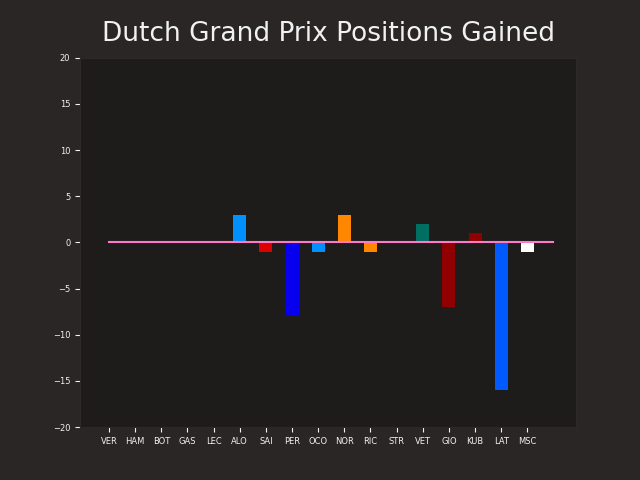

   names team_color  gained_positions
0    RIC    #ff8700                 1
1    NOR    #ff8700                 1
2    BOT    #00d2be                16
3    LEC    #dc0000                 1
4    PER    #0600ef                 3
5    SAI    #dc0000                 0
6    STR    #006f62                 2
7    ALO    #0090ff                 2
8    RUS    #005aff                 5
9    OCO    #0090ff                 2
10   LAT    #005aff                 2
11   VET    #006f62                -1
12   GIO    #900000                -6
13   KUB    #900000                 3
14   MSC    #ffffff                 3


<IPython.core.display.Javascript object>


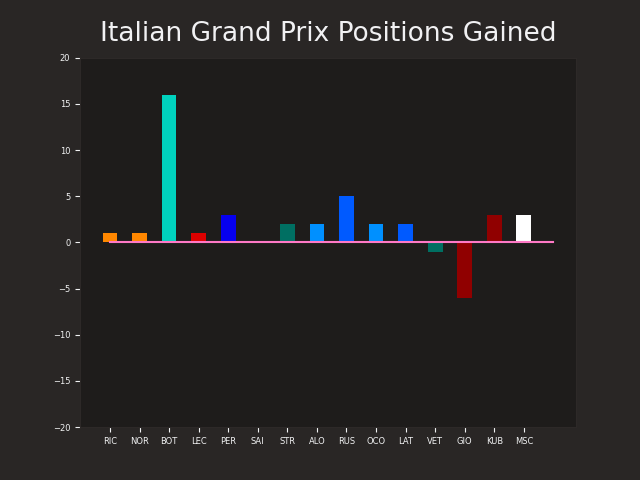

   names team_color  gained_positions
0    HAM    #00d2be                 3
1    VER    #0600ef                18
2    SAI    #dc0000                -1
3    RIC    #ff8700                 1
4    BOT    #00d2be                11
5    ALO    #0090ff                 0
6    NOR    #ff8700                -6
7    RAI    #900000                 5
8    PER    #0600ef                -1
9    RUS    #005aff                -7
10   STR    #006f62                -4
11   VET    #006f62                -2
12   GAS    #2b4562                -2
13   OCO    #0090ff                -5
14   LEC    #dc0000                 4
15   GIO    #900000                 1
16   TSU    #2b4562                -5
17   MAZ    #ffffff                -3


<IPython.core.display.Javascript object>


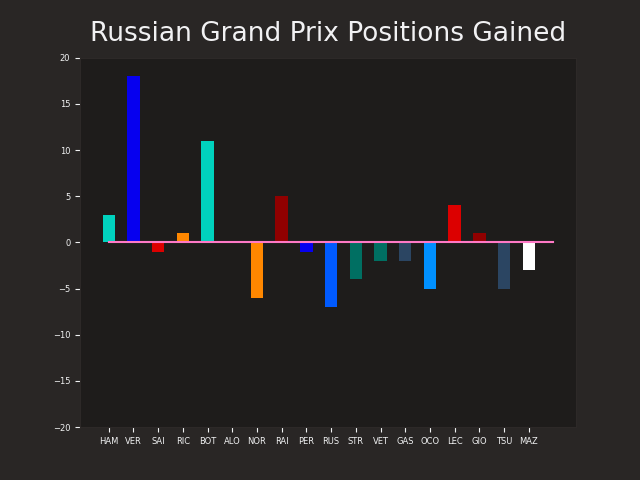

   names team_color  gained_positions
0    BOT    #00d2be                 0
1    VER    #0600ef                 0
2    PER    #0600ef                 3
3    LEC    #dc0000                -1
4    HAM    #00d2be                 6
5    GAS    #2b4562                -2
6    NOR    #ff8700                 0
7    SAI    #dc0000                11
8    STR    #006f62                -1
9    OCO    #0090ff                 2
10   GIO    #900000                 5
11   RAI    #900000                 5
12   RIC    #ff8700                 7
13   TSU    #2b4562                -5
14   RUS    #005aff                -2
15   ALO    #0090ff               -11
16   LAT    #005aff                -2
17   VET    #006f62                -8
18   MSC    #ffffff                -5
19   MAZ    #ffffff                -2


<IPython.core.display.Javascript object>


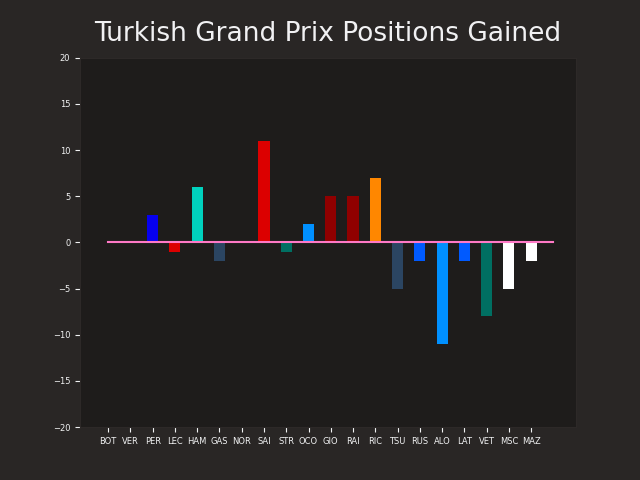

   names team_color  gained_positions
0    VER    #0600ef                 0
1    HAM    #00d2be                 0
2    PER    #0600ef                 0
3    LEC    #dc0000                 0
4    RIC    #ff8700                 1
5    BOT    #00d2be                 3
6    SAI    #dc0000                -2
7    NOR    #ff8700                -1
8    TSU    #2b4562                 1
9    VET    #006f62                 8
10   GIO    #900000                 1
11   STR    #006f62                 1
12   RAI    #900000                 2
13   RUS    #005aff                 6
14   LAT    #005aff                -1
15   MSC    #ffffff                 0
16   MAZ    #ffffff                 0


<IPython.core.display.Javascript object>


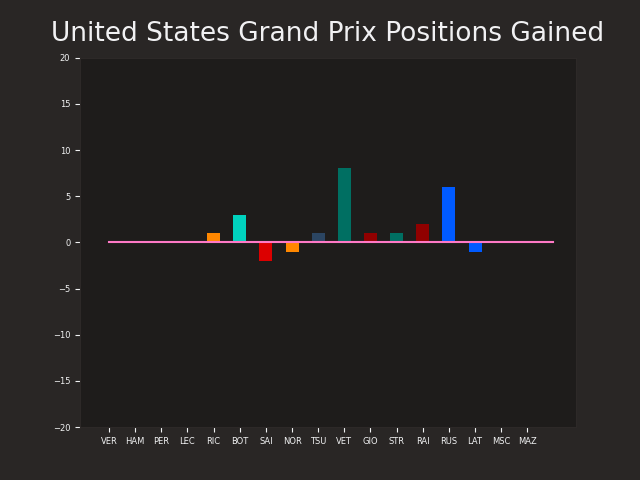

   names team_color  gained_positions
0    VER    #0600ef                 2
1    HAM    #00d2be                 0
2    PER    #0600ef                 1
3    GAS    #2b4562                 1
4    LEC    #dc0000                 3
5    SAI    #dc0000                 0
6    VET    #006f62                 2
7    RAI    #900000                 2
8    ALO    #0090ff                 3
9    NOR    #ff8700                 8
10   GIO    #900000                 0
11   RIC    #ff8700                -5
12   OCO    #0090ff                 6
13   STR    #006f62                 6
14   BOT    #00d2be               -14
15   RUS    #005aff                 0
16   LAT    #005aff                -4
17   MAZ    #ffffff                -3


<IPython.core.display.Javascript object>


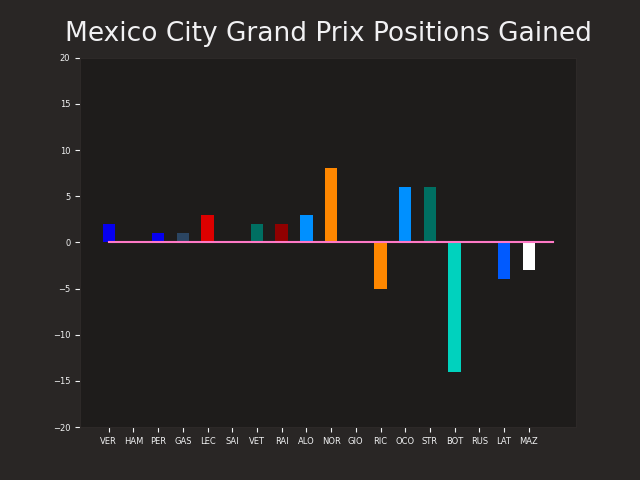

In [112]:
i = 0
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1', misc_mpl_mods=True)
for data in race_data_pos_gain:
    print(data)
    fig = plt.figure()
    ax = plt.subplot(111)
    x = data['names']
    ax.bar(range(0,len(data['names'])*2,2), data['gained_positions'], width=1, color=data['team_color'])#set bar values and positions
    ax.set_frame_on(True)
    plt.xticks(range(0,len(data['names'])*2,2), x)#set x ticks to correspond with where bars are and names of bars
    plt.ylim(-20,20)#constant x limits
    plt.plot([0,len(data['names'])*2],[0,0])
    plt.rcParams.update({'font.size': 6})
    plt.title(races[i].weekend.name+" Positions Gained")
    plt.show()
    i = i+1